In [65]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [85]:
datos = pd.read_csv("data.csv")
datos

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
996,997,Sibella,Lendrem,slendremro@soundcloud.com,11300.85,NaN,2866.75,2949.20,NaN,0.0848,0.6572
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

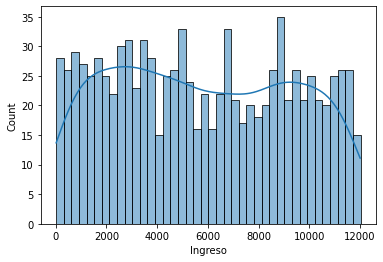

In [67]:
sns.histplot(data = datos, x = "Ingreso", binwidth = 300, kde = True ) # binwidth + grande = menos barras (tarda menos en hacer grafico)

In [68]:
""" hacer pairplot en el parcial si o si para ver grafico de distribucion de todas las columnas """

' hacer pairplot en el parcial si o si para ver grafico de distribucion de todas las columnas '

In [69]:
list(datos.columns)

['ID',
 'Nombre',
 'Apellido',
 'Mail',
 'Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [70]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   Nombre                         1000 non-null   object 
 2   Apellido                       1000 non-null   object 
 3   Mail                           1000 non-null   object 
 4   Ingreso                        968 non-null    float64
 5   Compras mensuales un pago      948 non-null    float64
 6   Compras mensuales cuotas       921 non-null    float64
 7   Pagos crédito                  943 non-null    float64
 8   Ahorro                         948 non-null    float64
 9   Frecuencia de compras un pago  941 non-null    float64
 10  Frecuencia de compras cuotas   943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


In [71]:
datos.describe()

,ID,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
count,1000.000000,968.000000,948.000000,921.000000,943.000000,948.000000,941.000000,943.000000
mean,500.500000,5785.631942,2451.846814,1944.068100,1480.925249,997.056951,0.482726,0.490983
std,288.819436,3496.756511,1433.223014,1141.592949,853.214458,573.771676,0.291558,0.290396
min,1.000000,16.150000,1.340000,3.120000,2.880000,3.000000,0.000100,0.000100
25%,250.750000,2717.545000,1229.677500,969.480000,772.330000,495.585000,0.228100,0.232300
50%,500.500000,5571.940000,2502.785000,1864.080000,1490.160000,1000.285000,0.471600,0.500300
75%,750.250000,8839.272500,3665.605000,2839.340000,2187.705000,1473.930000,0.741500,0.738800
max,1000.000000,11999.600000,4993.010000,3994.230000,2999.320000,1999.420000,0.999600,0.998100


In [72]:
w, p = stats.shapiro(datos["Ingreso"])

In [73]:
p #cuando p mayor a 0,05 la distribucion es normal

1.0

In [74]:
columnas = list(datos.columns) #lista de las columnas que tengo
columnas

['ID',
 'Nombre',
 'Apellido',
 'Mail',
 'Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [75]:
""" quiero borrar las primeras 4 columnas porque son string (lo veo en info)"""
del(columnas[:4])

In [76]:
columnas

['Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [77]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [78]:
verificacion_de_medias(columnas) #los numeros son muy chicos, esta muy lejos de ser normal. tiene que dar p > 0.05

{'Ingreso': 1.1006121123495764e-17,
 'Compras mensuales un pago': 1.9584066131987426e-16,
 'Compras mensuales cuotas': 1.1219991119325963e-15,
 'Pagos crédito': 1.6327737434123323e-15,
 'Ahorro': 4.0385173025391473e-16,
 'Frecuencia de compras un pago': 3.877314161007996e-17,
 'Frecuencia de compras cuotas': 1.0270321469317185e-16}

In [79]:
""" limpiar df de anomalias: datos nulos, outliers y duplicados """

' limpiar df de anomalias: datos nulos, outliers y duplicados '

In [80]:
""" limpio duplicados """

' limpio duplicados '

In [81]:
len(datos["Ingreso"]) #antes de hacer drop_duplicates era 1004 y ahora es 1000, eso significa que habia duplicados

1000

In [82]:
datos = datos.drop_duplicates(inplace=True)

In [83]:
""" elimino datos nulos"""

' elimino datos nulos'

In [86]:
datos = datos.dropna()

In [87]:
datos["Ingreso"].quantile(0.95)

11325.5125

In [90]:
datos["Ingreso"].quantile(0.05)

590.78

In [ ]:
datos.quantile(0.05).to_dict()

In [ ]:
Cs = datos["Ingreso"].quantile(0.95)
Ci = datos["Ingreso"].quantile(0.05)
datos = datos[(datos["Ingreso"] >= Ci) & (datos["Ingreso"] <= Cs)]

In [ ]:
""" Normalizo las columnas """
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(datos[columnas])

In [ ]:
""" 
pasos: 
1) elegir las columnas
2) ver el grafico (pairplot) de como quedan agrupados los puntos
3) hacer grafico del codo
4) decidir el numero de grupos
5) hacer el kmeans, hacer el clustering con esos grupos
6) hacer el grafico del silhoutte para saber si realmente estan bien distribuidos los puntos

"""